In [1]:
from scripts.gpx_parser import GPXParser
import matplotlib.pyplot as plt

In [2]:
parser = GPXParser("sample_data/cycling_track.gpx")
track_df = parser.parse_to_dataframe()
# km to m
track_df["km_diff"] = track_df["km"].diff()
track_df["elevation_diff"] = track_df["elevation"].diff().round(4)

track_df

,km,latitude,longitude,elevation,km_diff,elevation_diff
0,0.000000,50.820673,19.064820,278.43,NaN,NaN
1,0.000009,50.820673,19.064820,278.37,0.000009,-0.06
2,0.013826,50.820651,19.065013,278.31,0.013816,-0.06
3,0.044161,50.820673,19.065442,278.25,0.030335,-0.06
4,0.069431,50.820705,19.065797,278.16,0.025271,-0.09
...,...,...,...,...,...,...
3913,105.338089,50.820737,19.066150,278.01,0.023178,0.10
3914,105.363367,50.820705,19.065795,278.22,0.025278,0.21
3915,105.388500,50.820673,19.065442,278.25,0.025133,0.03
3916,105.418835,50.820651,19.065013,278.31,0.030335,0.06


<Axes: title={'center': 'Elevation Profile'}, xlabel='Distance (km)', ylabel='Elevation (m)'>

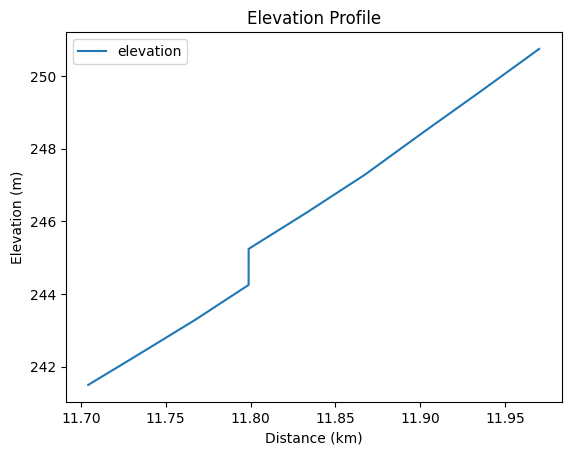

In [3]:
# between km 11 and 12
part = track_df.loc[(track_df["km"] >= 11.7) & (track_df["km"] <= 12)]

part.plot(x="km", y="elevation", title="Elevation Profile", ylabel="Elevation (m)", xlabel="Distance (km)")

In [4]:
part

,km,latitude,longitude,elevation,km_diff,elevation_diff
492,11.704317,50.825016,19.201951,241.50,0.031513,0.82
493,11.735840,50.825299,19.201960,242.39,0.031522,0.89
494,11.767362,50.825582,19.201969,243.29,0.031522,0.90
495,11.798829,50.825865,19.201977,244.25,0.031467,0.96
496,11.798838,50.825865,19.201977,245.24,0.000009,0.99
497,11.833061,50.826173,19.201990,246.24,0.034223,1.00
498,11.867293,50.826481,19.202002,247.28,0.034232,1.04
499,11.901525,50.826788,19.202015,248.44,0.034232,1.16
500,11.935757,50.827096,19.202027,249.58,0.034232,1.14
501,11.969989,50.827403,19.202040,250.74,0.034232,1.16


<Axes: title={'center': 'Elevation Profile'}, xlabel='Distance (km)', ylabel='Elevation (m)'>

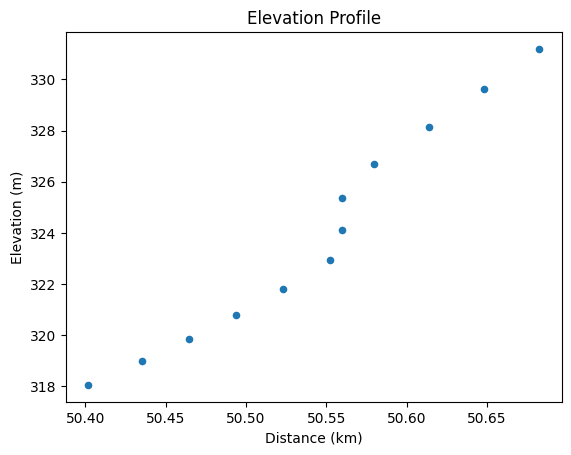

In [5]:
# between km 11 and 12
part = track_df.loc[(track_df["km"] >= 50.4) & (track_df["km"] <= 50.7)]

part.plot(x="km", y="elevation", title="Elevation Profile", ylabel="Elevation (m)", xlabel="Distance (km)", kind="scatter")

In [6]:
part

,km,latitude,longitude,elevation,km_diff,elevation_diff
1827,50.401951,50.679309,19.517341,318.06,0.020268,0.87
1828,50.435507,50.679009,19.517298,318.98,0.033555,0.92
1829,50.464757,50.678746,19.517298,319.86,0.029250,0.88
1830,50.493997,50.678483,19.517298,320.78,0.029241,0.92
1831,50.523247,50.678220,19.517298,321.81,0.029250,1.03
1832,50.552470,50.677958,19.517298,322.95,0.029222,1.14
1833,50.559798,50.677894,19.517269,324.13,0.007329,1.18
1834,50.559846,50.677894,19.517269,325.36,0.000048,1.23
1835,50.579800,50.677722,19.517190,326.70,0.019953,1.34
1836,50.614008,50.677442,19.516988,328.12,0.034208,1.42


In [7]:
from scripts.elevation_profile_v2 import ElevationProfile
elev_prof = ElevationProfile(track_df)
track_df_cleaned = elev_prof.get_track_df()

track_df_cleaned

c:\Users\Michal\Desktop\Orbita 25\GPX-analyzer\scripts\elevation_profile_v2.py:95: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  slope = slope.fillna(method='ffill').fillna(method='bfill')


,km,latitude,longitude,elevation,km_diff,elevation_diff,elev_smooth,segment,datapoint_slope,segment_slope
0,0.000000,50.820673,19.064820,278.43,10000.000000,NaN,278.303143,0,-0.055796,-0.094756
1,0.013826,50.820651,19.065013,278.31,0.013816,-0.06,278.295429,0,-0.055796,-0.094756
2,0.044161,50.820673,19.065442,278.25,0.030335,-0.06,278.244857,0,-0.166710,-0.094756
3,0.069431,50.820705,19.065797,278.16,0.025271,-0.09,278.150571,0,-0.373105,-0.094756
4,0.094572,50.820737,19.066150,278.01,0.025141,-0.15,278.021143,0,-0.514820,-0.094756
...,...,...,...,...,...,...,...,...,...,...
3783,105.338089,50.820737,19.066150,278.01,0.023178,0.10,278.040000,210,0.571968,0.133027
3784,105.363367,50.820705,19.065795,278.22,0.025278,0.21,278.179714,210,0.552718,0.133027
3785,105.388500,50.820673,19.065442,278.25,0.025133,0.03,278.265429,210,0.341037,0.133027
3786,105.418835,50.820651,19.065013,278.31,0.030335,0.06,278.305714,210,0.132803,0.133027


<Axes: title={'center': 'Elevation Profile'}, xlabel='Distance (km)', ylabel='Elevation (m)'>

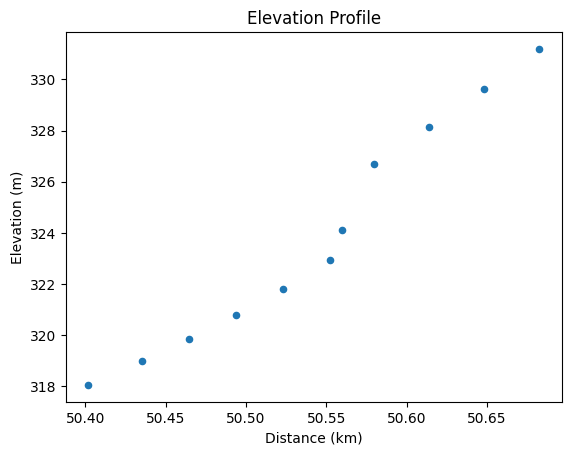

In [10]:
# between km 11 and 12
part = track_df_cleaned.loc[(track_df_cleaned["km"] >= 50.4) & (track_df_cleaned["km"] <= 50.7)]

part.plot(x="km", y="elevation", title="Elevation Profile", ylabel="Elevation (m)", xlabel="Distance (km)", kind="scatter")